In [ ]:
# Usaremos la base de datos Covertype Data Set
# https://archive.ics.uci.edu/ml/datasets/Covertype

# Esta base de datos contiene información sobre tipos de bósques, capturada para
# pequeñas regiones de 30x30 metros. Los datos fueron colectados por el US Forest
# Service (USFS). Las variables independientes 'X' son cartográficas, y sus
# respectivas etiquetas 'Y' son enteros [1, 7] indicando 7 posibles clases de bosque.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento, como en los de validación y los de prueba.

# Part 1: Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Read data file
df = pd.read_csv('forest_cover_type.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df

,Elevation,Aspect,Slope,H dist H,V dist H,H dist R,9am,Noon,3pm,H dist F,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Forest type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:
# Look at label's distribution
df['Forest type'].value_counts() # Base de datos desbalanceada.

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Forest type, dtype: int64

# Part 1.1 balance DB

In [7]:
# Balance dataset
def sampling_k_elements(group, N=2700):
  if len(group) < N:
    return group
  return group.sample(N)

df = df.groupby('Forest type').apply(sampling_k_elements).reset_index(drop=True)
df

,Elevation,Aspect,Slope,H dist H,V dist H,H dist R,9am,Noon,3pm,H dist F,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Forest type
0,3104,315,6,510,103,1994,205,235,170,2717,...,1,0,0,0,0,0,0,0,0,1
1,2801,253,23,153,11,2496,162,248,220,268,...,0,1,0,0,0,0,0,0,0,1
2,3056,268,6,218,0,1624,205,242,176,1671,...,0,0,0,0,0,0,0,0,0,1
3,2683,277,4,0,0,1833,209,240,169,1092,...,0,0,0,0,0,0,0,0,0,1
4,2978,100,9,335,38,1983,236,227,122,722,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,3391,4,18,537,197,4187,194,203,144,3693,...,0,0,0,0,0,0,0,0,1,7
18896,3421,342,3,258,73,942,213,235,159,994,...,0,0,0,0,0,0,0,0,1,7
18897,3294,62,13,170,35,3101,230,214,114,2345,...,0,0,0,0,0,0,0,0,0,7
18898,3289,113,26,175,46,2471,253,203,61,2687,...,0,0,0,0,0,0,0,1,0,7


In [8]:
# Look at label's distribution
df['Forest type'].value_counts() # Base de datos desbalanceada.

1    2700
2    2700
3    2700
4    2700
5    2700
6    2700
7    2700
Name: Forest type, dtype: int64

In [10]:
# Split training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.1)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(15309, 55)
(1701, 55)
(1890, 55)


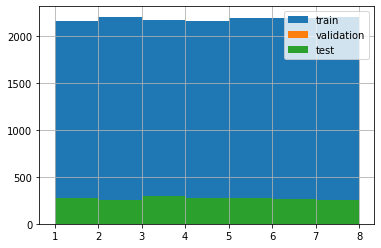

In [11]:
# Visualize distribution of splits
df_train['Forest type'].hist(bins=range(1, 9), label='train')
df_val['Forest type'].hist(bins=range(1, 9), label='validation')
df_test['Forest type'].hist(bins=range(1, 9), label='test')
plt.legend()
plt.show()

# Back to part 1

In [12]:
# Extract labels as matrices
y_train = df_train['Forest type'].to_numpy()
y_val = df_val['Forest type'].to_numpy()
y_test = df_test['Forest type'].to_numpy()
print(y_test[:10])

# And turn them into one-hot encoding format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)[:, 1:]
y_val = to_categorical(y_val, num_classes=8)[:, 1:]
y_test = to_categorical(y_test,num_classes=8)[:, 1:]

print("Y shapes")
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)
print(y_train[:10])

[6 1 2 5 1 4 7 3 3 5]
Y shapes
y_train: (15309, 7)
y_val: (1701, 7)
y_test: (1890, 7)
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [13]:
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))
print(y_test.sum(axis=0))

[2166. 2208. 2172. 2164. 2197. 2193. 2209.]
[260. 233. 233. 263. 231. 244. 237.]
[274. 259. 295. 273. 272. 263. 254.]


X shapes
x_train: (15309, 54)
x_val: (1701, 54)
x_test: (1890, 54)


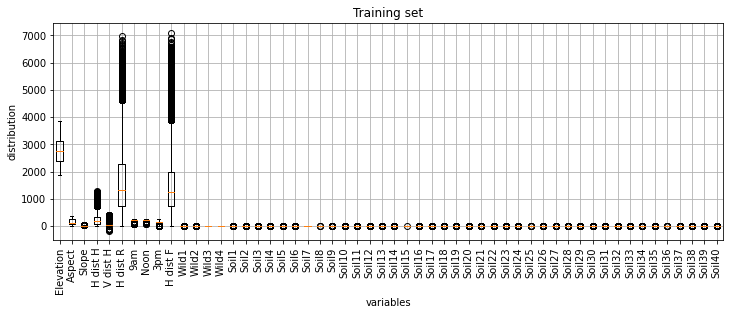

In [14]:
# Extract independent variables as matrices
x_train = df_train.to_numpy()[:, :-1]
x_val = df_val.to_numpy()[:, :-1]
x_test = df_test.to_numpy()[:, :-1]

print("X shapes")
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)

plt.figure(figsize=(12, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

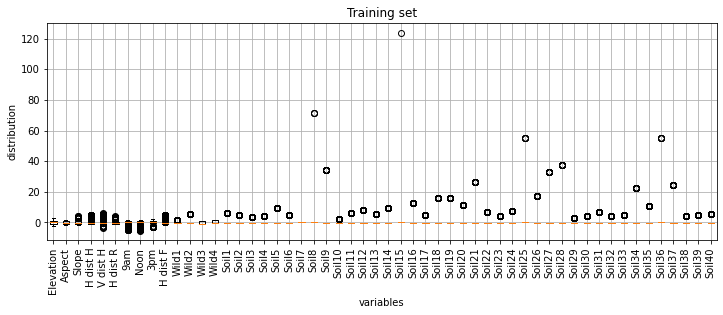

In [15]:
# Train scaler and apply it on the train set
scalerX = StandardScaler()
x_train = scalerX.fit_transform(x_train)

plt.figure(figsize=(12, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

In [16]:
# Apply trained scaler on the validation and test sets
x_val = scalerX.transform(x_val)
x_test = scalerX.transform(x_test)

# Part 2: Create DNN model and train it

In [17]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# == - ==
# La celda siguiente contiene tres modelos de redes neuronales. Comenta uno y usa otro.
# Evalua uno a la vez y reporta tus resultados.
#
# Nota que importamos layers tipo BatchNorm y Dropout, los cuales son usados en 
# distintas secciones del modelo.
# También importamos regularizadores l1 y l2, los cuales son usados como parametros
# de las capas.
#
# Nota también el uso del parametro "metrics" en la compilación del modelo.
# Este parámetro es sólo informativo, pero no se usa para optimizar el modelo.
# En el caso particular de este modelo, se indica la exactitud de la clasificación,
# sin embargo la minimización del error se hace con la función de pérdida "categorical_crossentropy"
# Puedes revisar más detalles en la documentación de Keras o tf.
#
# Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?
# Q2: ¿Por qué usamos softmax en la salida de la red?
# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento"
#     menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas y sus tamaños.
# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y sus tamaños)
#     en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2
#     para disminuir el error de generalización (validación).
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y tamaños para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación.
#     Reporta tu mejor modelo.
# =======

In [27]:
# Create a Deep Network
DNN = Sequential()
DNN.add(InputLayer(input_shape=x_train.shape[1:]))

#DNN.add(Dropout(rate=0.1))
DNN.add(Dense(4096))
DNN.add(BatchNormalization())
DNN.add(LeakyReLU())
DNN.add(Dense(512))
DNN.add(BatchNormalization())
DNN.add(LeakyReLU())
DNN.add(Dense(64, activation='swish'))
#DNN.add(LeakyReLU())

# -- Try 01 --
#DNN.add(Dropout(rate=0.15))
#DNN.add(Dense(512))
#DNN.add(BatchNormalization())
#DNN.add(LeakyReLU(0.2))
#DNN.add(Dense(128, activity_regularizer=l2(l=1e-3)))
#DNN.add(BatchNormalization())
#DNN.add(LeakyReLU(0.2))
#DNN.add(Dropout(rate=0.15))
#DNN.add(Dense(32, activity_regularizer=l2(l=1e-1)))
#DNN.add(BatchNormalization())
#DNN.add(LeakyReLU(0.2))
# -- ------ --

# -- Try 02 --
#DNN.add(Dropout(rate=0.2))
#DNN.add(Dense(512))
#DNN.add(BatchNormalization())
#DNN.add(Activation('relu'))
#DNN.add(Dense(512, activation='relu', activity_regularizer=l1(l=3e-4)))
#DNN.add(Dense(512, activation='relu', activity_regularizer=l2(l=3e-5)))
# -- ------ --

# -- Try 03 --
#DNN.add(Dropout(rate=0.3))
#DNN.add(Dense(512, activation='relu'))
#DNN.add(Dense(1024))
#DNN.add(BatchNormalization())
#DNN.add(Activation('relu'))
#DNN.add(Dense(512, activation='relu'))
#DNN.add(Dropout(rate=0.3))
#DNN.add(Dense(256, activation='relu'))
#DNN.add(Dense(128, activation='relu', activity_regularizer=l2(l=3e-3)))
#DNN.add(Dense(64, activation='relu', activity_regularizer=l1(l=6e-4)))
# -- ------ --

# Final: useful for all three models
DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4096)              225280    
                                                                 
 batch_normalization_5 (Batc  (None, 4096)             16384     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               2097664   
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)              

In [29]:
# Define training parameters
#from tensorflow.keras.optimizers import SGD
#sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
DNN.compile(optimizer='adadelta', loss='categorical_crossentropy',
            metrics=['binary_accuracy'])

In [30]:
# Train model
DNN.fit(x=x_train, y=y_train, batch_size=128, epochs=300, validation_data=(x_val, y_val),
        callbacks=[EarlyStopping(monitor='val_binary_accuracy', patience=10)])

Epoch 1/300
120/120 [==============================] - 10s 76ms/step - loss: 1.8797 - binary_accuracy: 0.8541 - val_loss: 1.8314 - val_binary_accuracy: 0.8571
Epoch 2/300
120/120 [==============================] - 9s 74ms/step - loss: 1.4955 - binary_accuracy: 0.8632 - val_loss: 1.6111 - val_binary_accuracy: 0.8571
Epoch 3/300
120/120 [==============================] - 9s 74ms/step - loss: 1.2820 - binary_accuracy: 0.8786 - val_loss: 1.3511 - val_binary_accuracy: 0.8675
Epoch 4/300
120/120 [==============================] - 9s 75ms/step - loss: 1.1596 - binary_accuracy: 0.8894 - val_loss: 1.1725 - val_binary_accuracy: 0.8872
Epoch 5/300
120/120 [==============================] - 9s 73ms/step - loss: 1.0846 - binary_accuracy: 0.8938 - val_loss: 1.0773 - val_binary_accuracy: 0.8954
Epoch 6/300
120/120 [==============================] - 9s 76ms/step - loss: 1.0287 - binary_accuracy: 0.8965 - val_loss: 1.0234 - val_binary_accuracy: 0.8981
Epoch 7/300
120/120 [==============================

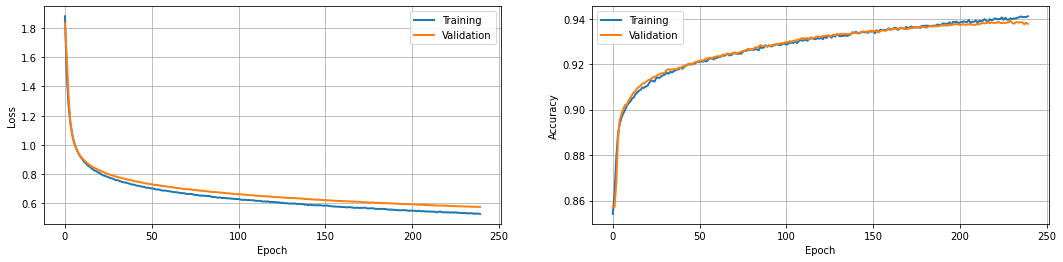

In [31]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['binary_accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_binary_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Save model to disk
#DNN.save("mymodel.h5")

# and load it back into memory
from tensorflow.keras.models import load_model
DNN = load_model("mymodel.h5")

In [32]:
# Compute test loss
test_loss = DNN.evaluate(x=x_test, y=y_test, verbose=False)
test_loss

[0.5686387419700623, 0.9374904632568359]

In [33]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test_hat[:10].round())

(1890, 7)
[[0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


In [34]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

print(y_test_hat_cat[:10])

[5 0 6 1 0 3 6 3 5 4]


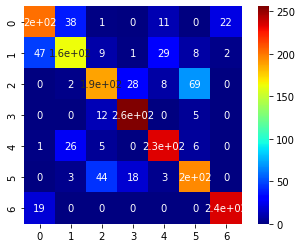

In [35]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)

sns.heatmap(Conf_Mat, annot=True, square=True, cmap='jet')
plt.show()

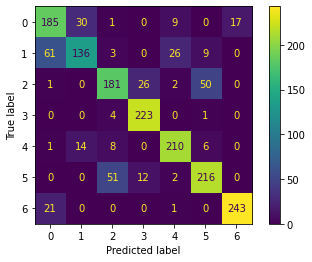

In [ ]:
# Just another way of showing the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_cat, y_test_hat_cat)
plt.show()